In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.losses import MeanSquaredError
import numpy as np
import matplotlib.pyplot as plt
import random

In [71]:
X_train = np.loadtxt('./data_1D_training_input.csv', delimiter=',')
Y_train = np.loadtxt('./data_1D_training_label.csv', delimiter=',')

In [72]:
print('Shape of X train:', X_train.shape)
print('Shape of Y train:', Y_train.shape)

Shape of X train: (100,)
Shape of Y train: (100,)


In [79]:
X_train = X_train.reshape(10,10,1)
Y_train = Y_train.reshape(10,10,1)

In [80]:
print('Shape of X train:', X_train.shape)
print('Shape of Y train:', Y_train.shape)

Shape of X train: (10, 10, 1)
Shape of Y train: (10, 10, 1)


<function matplotlib.pyplot.show(close=None, block=None)>

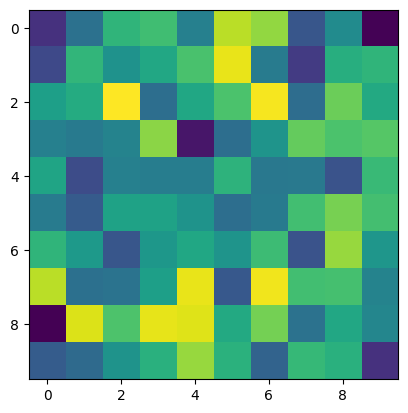

In [81]:
plt.imshow(X_train[:,:])
plt.show

In [82]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape = (10,10,1)),
    MaxPooling2D((2,2)),

    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(100, activation = 'relu'),
    Dense(100, activation = 'sigmoid')
])

In [86]:
model.compile(
    optimizer='adam', 
    loss = MeanSquaredError(), 
    metrics=['accuracy'])

In [87]:
model.fit(X_train, Y_train, epochs = 5)

Epoch 1/5


ValueError: in user code:

    File "c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None

    ValueError: Exception encountered when calling layer 'conv2d_49' (type Conv2D).
    
    Negative dimension size caused by subtracting 3 from 1 for '{{node sequential_17/conv2d_49/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](sequential_17/ExpandDims, sequential_17/conv2d_49/Conv2D/ReadVariableOp)' with input shapes: [?,10,1,1], [3,3,1,32].
    
    Call arguments received by layer 'conv2d_49' (type Conv2D):
      • inputs=tf.Tensor(shape=(None, 10, 1, 1), dtype=float32)


In [ ]:
model.evaluate(X_test, Y_test)

13/13 [==============================] - 0s 21ms/step - loss: 0.7270 - accuracy: 0.6075


[0.72701096534729, 0.6075000166893005]

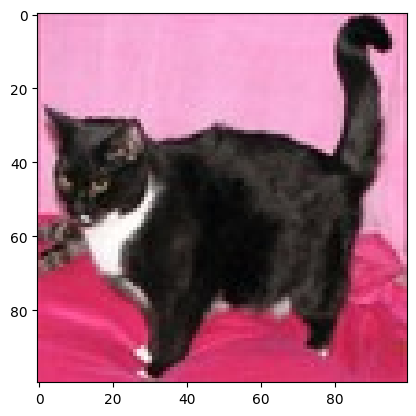

1/1 [==============================] - 0s 21ms/step
Our model says it is a : cat


In [ ]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'

print("Our model says it is a :", pred)